# Covid in Spain vs France. Updated every 24 hours

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get Covid Data from OurWorldInData DataBase. Updated every 24h

In [18]:
covid_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", parse_dates=["date"], index_col="date")
covid_df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [19]:
spain = covid_df[covid_df.iso_code == "ESP"].copy()
spain.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2021-12-26,ESP,Europe,Spain,5718007.0,0.0,37497.143,89019.0,0.0,44.429,122322.841,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2021-12-27,ESP,Europe,Spain,5932626.0,214619.0,56770.714,89139.0,120.0,49.429,126914.092,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2021-12-28,ESP,Europe,Spain,6032297.0,99671.0,63891.857,89253.0,114.0,52.286,129046.310,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2021-12-29,ESP,Europe,Spain,6133057.0,100760.0,69708.857,89331.0,78.0,56.286,131201.825,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
2021-12-30,ESP,Europe,Spain,6294745.0,161688.0,82391.143,89405.0,74.0,55.143,134660.746,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN


In [20]:
france = covid_df[covid_df.iso_code == "FRA"].copy()
france.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2021-12-26,FRA,Europe,France,9160911.0,27697.0,70034.857,122704.0,96.0,164.143,135588.138,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2021-12-27,FRA,Europe,France,9191370.0,30459.0,72232.571,122960.0,256.0,168.714,136038.953,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2021-12-28,FRA,Europe,France,9371178.0,179808.0,87511.286,123250.0,290.0,177.429,138700.243,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2021-12-29,FRA,Europe,France,9579277.0,208099.0,105200.857,123434.0,184.0,179.429,141780.259,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2021-12-30,FRA,Europe,France,9785821.0,206544.0,121620.286,123616.0,182.0,179.857,144837.260,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN


In [21]:
spain_filtered = spain[["new_cases_smoothed", "new_deaths_smoothed", "weekly_hosp_admissions"]]
spain_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 699 entries, 2020-02-01 to 2021-12-30
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_cases_smoothed      694 non-null    float64
 1   new_deaths_smoothed     668 non-null    float64
 2   weekly_hosp_admissions  510 non-null    float64
dtypes: float64(3)
memory usage: 21.8 KB


In [22]:
france_filtered = france[["new_cases_smoothed", "new_deaths_smoothed", "weekly_hosp_admissions"]]
france.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 707 entries, 2020-01-24 to 2021-12-30
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    707 non-null    object 
 1   continent                                   707 non-null    object 
 2   location                                    707 non-null    object 
 3   total_cases                                 707 non-null    float64
 4   new_cases                                   704 non-null    float64
 5   new_cases_smoothed                          699 non-null    float64
 6   total_deaths                                685 non-null    float64
 7   new_deaths                                  685 non-null    float64
 8   new_deaths_smoothed                         685 non-null    float64
 9   total_cases_per_million                     707 non-null    float64


### Clean data

In [23]:
#Replace negative numbers with nan
spain_filtered.loc[spain_filtered['new_cases_smoothed'] < 0, 'new_cases_smoothed']=np.nan
spain_filtered.loc[spain_filtered['new_deaths_smoothed'] < 0, 'new_deaths_smoothed']=np.nan

france_filtered.loc[france_filtered['new_cases_smoothed'] < 0, 'new_cases_smoothed']=np.nan
france_filtered.loc[france_filtered['new_deaths_smoothed'] < 0, 'new_deaths_smoothed']=np.nan

/home/edgar/miniconda3/envs/data_analysis/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/edgar/miniconda3/envs/data_analysis/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#Forward fill nans
spain_filtered = spain_filtered.fillna(method="ffill")

france_filtered = france_filtered.fillna(method="ffill")

## Visualizations

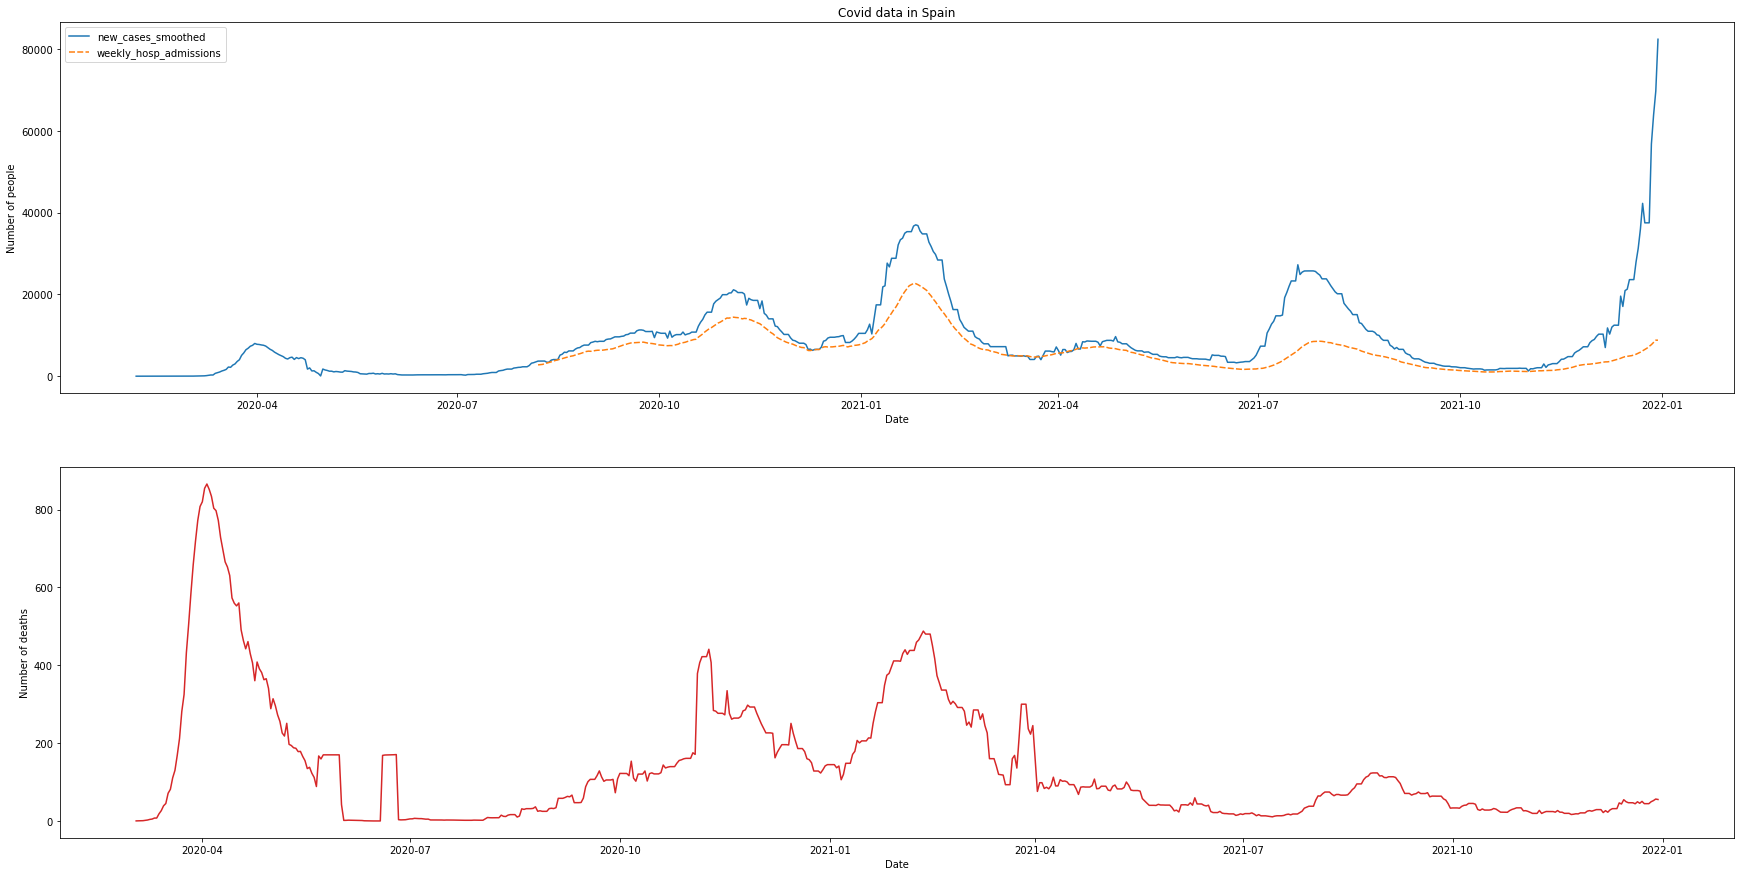

In [25]:
fig, ax = plt.subplots(nrows=2, figsize=(30, 15))
sns.lineplot(data=spain_filtered[["new_cases_smoothed","weekly_hosp_admissions"]], ax=ax[0])
sns.lineplot(data=spain_filtered["new_deaths_smoothed"], color='tab:red', ax=ax[1])
ax[0].set_title("Covid data in Spain")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of people")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of deaths")
plt.show()

## Interactive Visualizations

In [26]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [27]:
spain_filtered[["new_cases_smoothed","weekly_hosp_admissions"]].plot_bokeh.line(sizing_mode='stretch_both')

Figure(id='1247', ...)

In [28]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [29]:
# Creating trace1
trace1 = go.Scatter(
                    x = spain_filtered.index,
                    y = spain_filtered["new_cases_smoothed"],
                    mode = "lines",
                    name = "Spain: New Cases",
                    marker = dict(color = 'yellow'),
                    text= spain_filtered["new_cases_smoothed"])
# Creating trace2
trace2 = go.Scatter(
                    x = spain_filtered.index,
                    y = spain_filtered["weekly_hosp_admissions"],
                    mode = "lines",
                    name = "Spain: New Hospitalizations",
                    marker = dict(color = 'blue'),
                    text= spain_filtered["weekly_hosp_admissions"])
trace3 = go.Scatter(
                    x = spain_filtered.index,
                    y = spain_filtered["new_deaths_smoothed"],
                    mode = "lines",
                    name = "Spain: New Deaths",
                    marker = dict(color = 'green'),
                    text= spain_filtered["new_deaths_smoothed"])
trace4 = go.Scatter(
                    x = france_filtered.index,
                    y = france_filtered["new_cases_smoothed"],
                    mode = "lines",
                    name = "France: New Cases",
                    marker = dict(color = 'red'),
                    text= france_filtered["new_cases_smoothed"])
# Creating trace2
trace5 = go.Scatter(
                    x = france_filtered.index,
                    y = france_filtered["weekly_hosp_admissions"],
                    mode = "lines",
                    name = "France: New Hospitalizations",
                    marker = dict(color = 'purple'),
                    text= france_filtered["weekly_hosp_admissions"])
trace6 = go.Scatter(
                    x = france_filtered.index,
                    y = france_filtered["new_deaths_smoothed"],
                    mode = "lines",
                    name = "France: New Deaths",
                    marker = dict(color = 'grey'),
                    text= france_filtered["new_deaths_smoothed"])
data = [trace1, trace4, trace2, trace5, trace3, trace6]
layout = dict(title = 'Covid 19: Cases - Deaths - Hospitalizations',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Plot Country from imput

In [30]:
inp = input("Please enter a valid country code:")
inp = inp.upper()
print(inp)

USA


In [31]:
country = covid_df[covid_df["iso_code"] == inp].copy()
if country.empty:
    print("Country code doesnt exist! :(")
else:
    country_filtered = country[["new_cases_smoothed", "new_deaths_smoothed", "weekly_hosp_admissions"]] 
    spain_filtered.loc[spain_filtered['new_cases_smoothed'] < 0, 'new_cases_smoothed']=np.nan
    spain_filtered.loc[spain_filtered['new_deaths_smoothed'] < 0, 'new_deaths_smoothed']=np.nan
    spain_filtered = spain_filtered.fillna(method="ffill")

    # Creating trace1
    trace1 = go.Scatter(
                        x = country_filtered.index,
                        y = country_filtered["new_cases_smoothed"],
                        mode = "lines",
                        name = inp + ": New Cases",
                        marker = dict(color = 'yellow'),
                        text= country_filtered["new_cases_smoothed"])
    # Creating trace2
    trace2 = go.Scatter(
                        x = country_filtered.index,
                        y = country_filtered["weekly_hosp_admissions"],
                        mode = "lines",
                        name = inp + ": New Hospitalizations",
                        marker = dict(color = 'blue'),
                        text= country_filtered["weekly_hosp_admissions"])
    trace3 = go.Scatter(
                        x = country_filtered.index,
                        y = country_filtered["new_deaths_smoothed"],
                        mode = "lines",
                        name = inp + ": New Deaths",
                        marker = dict(color = 'orange'),
                        text= country_filtered["new_deaths_smoothed"])
    trace4 = go.Scatter(
                        x = spain_filtered.index,
                        y = spain_filtered["new_cases_smoothed"],
                        mode = "lines",
                        name = "Spain: New Cases",
                        marker = dict(color = 'red'),
                        text= spain_filtered["new_cases_smoothed"])
    # Creating trace2
    trace5 = go.Scatter(
                        x = spain_filtered.index,
                        y = spain_filtered["weekly_hosp_admissions"],
                        mode = "lines",
                        name = "Spain: New Hospitalizations",
                        marker = dict(color = 'green'),
                        text= spain_filtered["weekly_hosp_admissions"])
    trace6 = go.Scatter(
                        x = spain_filtered.index,
                        y = spain_filtered["new_deaths_smoothed"],
                        mode = "lines",
                        name = "Spain: New Deaths",
                        marker = dict(color = 'pink'),
                        text= spain_filtered["new_deaths_smoothed"])
    
    data = [trace1, trace4, trace2, trace5, trace3, trace6]
    layout = dict(title = 'Covid 19: Cases - Deaths - Hospitalizations',
                xaxis= dict(title= 'Date',ticklen= 5,zeroline= False)
                )
    fig = dict(data = data, layout = layout)
    iplot(fig)